# Introduction

In this project, I aim to analyze OLIST e-commerce dataset, focusing specifically on the <b>order</b> dataset and <b>the order_items</b> dataset. These datasets provide detailed information on customer orders, including timestamps for order placement, approval, shipping, and delivery, as well as item-level details like product information and seller performance.

Before diving into the analysis, it is essential to clean the data to ensure accuracy and reliability. This involves handling missing values, correcting inconsistencies, adjusting outliers, and ensuring proper data types. A well-cleaned dataset will allow me to perform meaningful analysis on order processing efficiency, delivery performance, and other key metrics.

In this notebook, I will first clean the <b>order</b> dataset and the <b>order_items</b> dataset to ensure each dataset is free from errors and inconsistencies.<br> Once the cleaning process is complete, <b>I will merge the two datasets</b> to allow for a more comprehensive analysis of order fulfillment, delivery times, and potential inefficiencies in the e-commerce process and i will subsequently answer key business questions.

<b>Dataset source:</b> https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce 

---

## Data cleaning 1 - order dataset

### Load the dataset using pd.read_csv() or equivalent function

In [1]:
import pandas as pd
order = pd.read_csv("orders.csv")

In [2]:
#check the dataset columns
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

#### first 10 rows to visually inspect the data

In [3]:
order.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


#### check data types, null values, and the overall structure

In [4]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Get statistical summaries for numerical columns

In [5]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### check duplicates

In [6]:
duplicates = order.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


### check for missing values

In [7]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
order[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = order[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].apply(
    lambda x: x.fillna(x.mode()[0]))

In [9]:
print("updated columns:")
order[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum()

updated columns:


order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64

### Ensure proper data types

In [10]:
order.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [11]:
#convert all the date columns to datetime
date_columns = [
    'order_approved_at',
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    order[col] = pd.to_datetime(order[col], errors='coerce')

In [12]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Detect Outliers in Delivery Times

#### Difference between dates

I calculate the time differences between key stages in the order fulfillment process to identify unusual or unrealistic delivery times. By examining the differences, I can spot outliers such as negative time values or excessively long delivery periods, which may indicate issues in the process or errors in the dataset.

>order_approval: Time taken from order purchase timestamp to order approval.<br>
>carrier_pickup_time: Time taken for the seller to hand over the order to the shipping carrier.<br>
>delivery_time: Time taken by the carrier to deliver the product to the customer.<br>
>delivery_accuracy: difference between the estimated and actual delivery date, indicating how accurate the delivery was.<br><br>
>The .dt.days function is used to convert the timedelta values (the difference between two datetime objects) into days.

In [13]:
#calculate the time differences in order to find outliers
order['order_approval'] = (order['order_approved_at'] - order['order_purchase_timestamp']).dt.days
order['carrier_pickup_time'] = (order['order_delivered_carrier_date'] - order['order_approved_at']).dt.days
order['delivery_time'] = (order['order_delivered_customer_date'] - order['order_delivered_carrier_date']).dt.days
order['delivery_accuracy'] = (order['order_estimated_delivery_date'] - order['order_delivered_customer_date']).dt.days
order[['order_approval', 'carrier_pickup_time', 'delivery_time', 'delivery_accuracy']].head(10)

,order_approval,carrier_pickup_time,delivery_time,delivery_accuracy
0,0,2,6,7
1,1,0,12,5
2,0,0,9,17
3,0,3,9,12
4,0,0,1,9
5,0,1,14,5
6,2,391,-559,193
7,0,5,4,11
8,1,1,6,31
9,0,12,5,6


#### Outliers between dates - negative values

When analyzing the following columns: order_approval, carrier_pickup_time, delivery_time, and delivery_accuracy. I noticed several <b>negative values</b> and other discrepancies that did not make sense (e.g., negative time differences and values exceeding reasonable limits).

In [14]:
# Count total number of negative values in all specified columns
total_negative_values = (order[['order_approval', 'carrier_pickup_time', 'delivery_time', 'delivery_accuracy']] < 0).sum().sum()
print("total negative values: ", total_negative_values)

total negative values:  12467


>Since negative values represent impossible scenarios in the dataset, I addressed them by completely removing these rows. I chose to drop them to ensure the accuracy and integrity of the data. However, for values exceeding reasonable limits (such as times over 100 days), I decided to keep them, as they may represent rare but valid cases.
>These corrections ensure that the data remains consistent and ready for further analysis.

##### Removing negative values that represent impossible scenarios

In [15]:
order = order[~(order[['order_approval', 'carrier_pickup_time', 'delivery_time', 'delivery_accuracy']] < 0).any(axis=1)]
check_negative_values = (order[['order_approval', 'carrier_pickup_time', 'delivery_time', 'delivery_accuracy']] < 0).sum().sum()
print("total negative values: ", check_negative_values)

total negative values:  0


#### Outliers between dates - Excessive values

After removing negative values that represent inconsistent dates (e.g., delivery dates before the purchase date), it’s important to check for excessive values (e.g., deliveries over 100 days) in the remaining time columns, such as order_approval, carrier_pickup_time, delivery_time, and delivery_accuracy.

In [16]:
# Checking for excessive values (values greater than 100 days)
excessive_values = order[(order['order_approval'] > 100) | 
                         (order['carrier_pickup_time'] > 100) | 
                         (order['delivery_time'] > 100) | 
                         (order['delivery_accuracy'] > 100)]

total_excessive_rows = excessive_values.shape[0]
print("Total number of excessive values over 100 days:", total_excessive_rows)

Total number of excessive values over 100 days: 5


In [17]:
print("Total number of excessive values over 100 days:", total_excessive_rows)
excessive_values[['order_approval', 'carrier_pickup_time', 'delivery_time', 'delivery_accuracy']]

Total number of excessive values over 100 days: 5


,order_approval,carrier_pickup_time,delivery_time,delivery_accuracy
15791,1,1,4,139
40094,0,1,2,146
57160,1,7,11,134
67488,0,3,4,108
86444,1,4,11,123


#### Decision on Excessive Values

>After identifying the rows with values over the threshold (e.g., 100 days), I decided to retain these values in the dataset for the following reasons:
>- Rare but Valid Scenarios: Some delays may happen due to exceptional circumstances (e.g., long international shipping times, special handling, or other logistical delays).
>- Preserving Data Integrity: Removing these rows could lead to loss of important edge cases, which may provide valuable insights into certain scenarios or patterns in our analysis.
Thus, despite appearing as outliers or excessive values, I will keep these rows to avoid losing potentially important data.

---

## Data cleaning 2 - order_items dataset

### Load the dataset

In [18]:
import pandas as pd
items = pd.read_csv('order_items.csv')

#### first 10 rows to visually inspect the data

In [19]:
items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


#### get summary statistics for numerical columns

In [20]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### check column data types and missing values 

In [21]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Identify and remove any duplicate rows if they exist

In [22]:
duplicate_rows = items.duplicated().sum()
print(f"Number of duplicated rows: ", duplicate_rows)

Number of duplicated rows:  0


#### Identify missing values in each column

In [23]:
missing_values = items.isnull().sum()
print("Number of missing values per column: ")
missing_values

Number of missing values per column: 


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Ensure Proper Data Types

In [24]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [25]:
#convert order_id, order_item_id and product id from object to categorical columns
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items[['order_id', 'product_id', 'seller_id']] = items[['order_id', 'product_id', 'seller_id']].astype('category')
items.dtypes

order_id                     category
order_item_id                   int64
product_id                   category
seller_id                    category
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

### Checking for Outliers

#### Import the necessary libraries

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

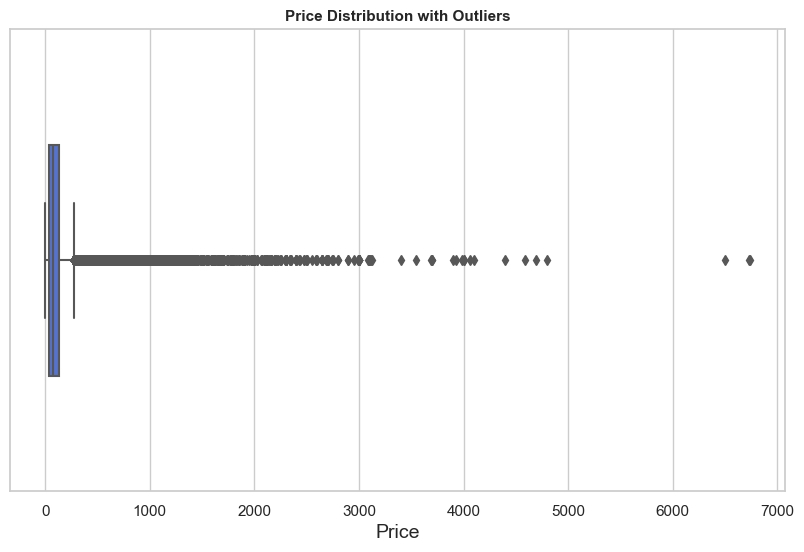

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x=items['price'], color='royalblue', width=0.5)
plt.title('Price Distribution with Outliers', fontsize=11, weight='bold')
plt.xlabel('Price', fontsize=14)
plt.show()

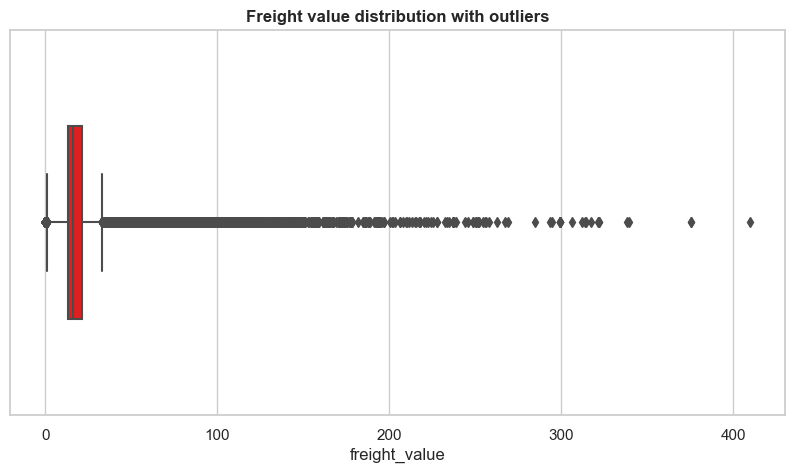

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.boxplot(x=items['freight_value'], color='red', width=0.5)
plt.title('Freight value distribution with outliers', weight='bold')
plt.show()

In [29]:
correlation = items['price'].corr(items['freight_value'])
print('Correlation between price and freight value: ', correlation)

Correlation between price and freight value:  0.41420431036303473


>After analyzing the correlation between price and freight value, I found that the relationship is moderate (correlation coefficient ≈ 0.41). This suggests that while higher-priced items tend to have higher shipping costs, the relationship is not strong enough to justify extreme outliers.<br><br>
>To address these extreme values, I will apply the 99th percentile method to remove the top 1% of both price and freight value.<br> This ensures that we retain the majority of the data while eliminating unreasonably high values that could skew the analysis

#### Handling Outliers Using the 99th Percentile Threshold

In [30]:
price_threshold = items['price'].quantile(0.99)
freight_threshold = items['freight_value'].quantile(0.99)

items_cleaned = items[(items['price'] <= price_threshold) & (items['freight_value'] <= freight_threshold)]
rows_removed = items.shape[0] - items_cleaned.shape[0]
print(f"Rows removed: {rows_removed}")
order_items = items_cleaned

Rows removed: 2018


<b>Data cleaning conclusion:</b> Before merging and exploring the final dataset, it's important to ensure that both the order and order_items datasets are properly cleaned and structured. Now that missing values, duplicates, incorrect data types, and outliers have been addressed, the next step is to merge them for a more comprehensive analysis. This will allow me to analyze order details alongside product and seller information, providing deeper insights into sales trends and overall business operations.

---

## Data merging 

I will perform an <b>inner join</b> on the order_id to combine the datasets, which ensures that we are only keeping rows where the order exists in both datasets.

In [31]:
order_df = pd.merge(order, order_items, on='order_id', how='inner')
order_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval,carrier_pickup_time,delivery_time,delivery_accuracy,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,2,6,7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,0,12,5,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,0,9,17,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,3,9,12,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,0,1,9,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,0,1,14,5,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,0,5,4,11,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1,1,6,31,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,0,12,5,6,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,0,1,10,8,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53


In [32]:
#save the merged dataset
order_df.to_csv('order_df.csv', index=False)